In [429]:
from difeomorfismos_solvers import *
from difeomorfismo import *
init_printing()

<H3>Difeomorsimos Cuadratico + lineal </H3>
<H3>$X^{c} = M_{dd}^{c}E^{d}E^{d}$<H3>
<H3>$Y_{c} = N_{cee}I^{e}I^{e}$</H3>



# <H3>Defino la dimension que utilizare</H3>

In [430]:
n=2


<H3>Estos son las dos coordenadas del difeomorfismo</H3>

In [431]:
ZE, ZX = set_coordinates(n)

<H3>Estas son las constates para las ecuaciones del difeomorfismo Cuadratico + lineal</H3>

In [432]:
import operator
A,c1=set_constants_a(n,'A','s')
D,c2=set_constants_a(n,'D','s')
B,c3=set_constants_axb(n,n,'B',0)
G,c4=set_constants_axb(n,n,'G',0)
C,c5=set_constants_axb(n,n,'C',0)
H,c6=set_constants_axb(n,n,'H',0)
M,c7=set_constants_axbxc(n,n,n,'M','s',operator.ge)
N,c8=set_constants_axbxc(n,n,n,'N','s',operator.ge)
J,c9=set_constants_axbxc00(n,n,n,'J','s')
K,c10=set_constants_axbxc00(n,n,n,'K','s')
P,c11 = set_constants_axbxcxdxe(n,n,n,n,n,'P','s')
Q,c12 = set_constants_axbxcxdxe(n,n,n,n,n,'Q','s')
R,c13 = set_constants_axbxcxdxe(n,n,n,n,n,'R','s')
T,c14 = set_constants_axbxcxdxe(n,n,n,n,n,'T','s')

p,c1=set_constants_axb(n,n,'p','s')

In [433]:
c = c1 + c2 + c3 + c4 + c5 + c6 + c7 + c8 + c9 + c10 + c11 + c12 + c13 + c14
c = list(filter(lambda a: a != 0, c))

In [434]:
dc = {}
for x in c:
    dc[x]=1

In [435]:
dZE = {}
for x in ZE:
    dZE[x]=1

In [436]:
L0 = GI_difeomorphism(A,B,C,D,G,H,J,K,M,N,n,ZX,ZE)
Matrix(L0)

⎡                                   F(\Phi, E₁, E₂, I₁, I₂)                   
⎢                                                                             
⎢            2                                                 2              
⎢A₁⋅\Phi + E₁ ⋅M₁₁₁ + E₁⋅E₂⋅M₁₂₁ + E₁⋅I₁⋅J₁₁₁ + E₁⋅I₂⋅J₁₁₂ + E₂ ⋅M₁₂₂ + E₂⋅I₁⋅
⎢                                                                             
⎢            2                                                 2              
⎢A₂⋅\Phi + E₁ ⋅M₂₁₁ + E₁⋅E₂⋅M₂₂₁ + E₁⋅I₁⋅J₂₁₁ + E₁⋅I₂⋅J₂₁₂ + E₂ ⋅M₂₂₂ + E₂⋅I₁⋅
⎢                                                                             
⎢                                                                2            
⎢D₁⋅\Phi + E₁⋅I₁⋅K₁₁₁ + E₁⋅I₂⋅K₁₂₁ + E₂⋅I₁⋅K₁₁₂ + E₂⋅I₂⋅K₁₂₂ + I₁ ⋅N₁₁₁ + I₁⋅I
⎢                                                                             
⎢                                                                2            
⎣D₂⋅\Phi + E₁⋅I₁⋅K₂₁₁ + E₁⋅I₂⋅K₂₂₁ + E₂⋅I₁⋅K₂₁₂ + E₂

In [461]:
cof = [[R,T],[P,Q]]
power = [[[-1,0,0,-1],[0,0,0,0]],[[-1,0,0,-1],[0,0,0,0]]]

In [462]:
L0 = pow_difeomorphism(cof,n,ZX,ZE,power)
Matrix(L0)

⎡                                                                 F(\Phi, E₁, 
⎢                                                                             
⎢                                           3            2                  2 
⎢  2                           2          I₁ ⋅R₁₂₁₁₁   I₁ ⋅I₂⋅R₁₂₁₂₁   I₁⋅I₂ ⋅
⎢I₁ ⋅T₁₁₁₁₁ + I₁⋅I₂⋅T₁₁₁₁₂ + I₂ ⋅T₁₁₁₂₂ + ────────── + ───────────── + ───────
⎢                                             E₂             E₂              E
⎢                                                                             
⎢                                           3            2                  2 
⎢  2                           2          I₁ ⋅R₂₂₁₁₁   I₁ ⋅I₂⋅R₂₂₁₂₁   I₁⋅I₂ ⋅
⎢I₁ ⋅T₂₁₁₁₁ + I₁⋅I₂⋅T₂₁₁₁₂ + I₂ ⋅T₂₁₁₂₂ + ────────── + ───────────── + ───────
⎢                                             E₂             E₂              E
⎢                                                                             
⎢  3            3            2               2      

In [463]:

LA = []


In [464]:
f = zeros(n)
h = zeros(n)


for x in range(0,n):
    for y in range(0,n):
        if x == y: f[x,y]=1/Function('f')(*ZX)
        if x == y:
            part = 0
            for z in range(1,n+1):
                part = part + p[x][z-1]*ZE[z]*ZE[z+n]
            h[x,y]=part
#h[0,0]=(q[0]*ZE[1]*ZE[3]+q[1]*ZE[2]*ZE[4])

In [465]:
f,h

⎛⎡         1                                ⎤                                 
⎜⎢────────────────────           0          ⎥, ⎡E₁⋅I₁⋅p₁₁ + E₂⋅I₂⋅p₁₂         
⎜⎢f(F, X₁, X₂, Y₁, Y₂)                      ⎥  ⎢                              
⎜⎢                                          ⎥  ⎣          0            E₁⋅I₁⋅p
⎜⎢                               1          ⎥                                 
⎜⎢         0            ────────────────────⎥                                 
⎝⎣                      f(F, X₁, X₂, Y₁, Y₂)⎦                                 

               ⎞
   0          ⎤⎟
              ⎥⎟
₂₁ + E₂⋅I₂⋅p₂₂⎦⎟
               ⎟
               ⎟
               ⎠

In [466]:
S,EQS = poly_difeomorphism(L0,ZE,dc,dZE,h,factor)
EQS = clean_system00(EQS,n)   

In [572]:
ew = EQS[3,4]
chomp = []
for z in range(1,n+1):
                chomp.append(ZE[z]*ZE[z+n])
chew = EQS[1:1+n,1+n:2*n+1]

tai = []
for x in range(0,n):
    for y in range(0,n):
        if x == y:
            for z in chomp:
                tai.append(chew[x,y][z])
Matrix(list(ew.keys())),Matrix(list(ew.values())),Matrix(tai)

⎛⎡     2   ⎤                                                                  
⎜⎢   E₂    ⎥, ⎡                                                               
⎜⎢         ⎥  ⎢                                                               
⎜⎢   2   2 ⎥  ⎢                                                               
⎜⎢ E₂ ⋅I₁  ⎥  ⎢                                                               
⎜⎢ ─────── ⎥  ⎢                                                               
⎜⎢     2   ⎥  ⎢                                                               
⎜⎢   I₂    ⎥  ⎢                                                               
⎜⎢         ⎥  ⎢                                                               
⎜⎢     3   ⎥  ⎢                                                               
⎜⎢   E₁    ⎥  ⎢                                                               
⎜⎢   ───   ⎥  ⎢                                                               
⎜⎢    E₂   ⎥  ⎢                                     

In [573]:
# all_sol = solve_pair(EQS[1,3],EQS[2,4],factor)

In [574]:
all_sol = solve_part(ew,simplify,tai)


In [560]:
# all_sol = {}
# all_sol[R[1][0][0][1,0]] = R[1][1][0][1,1]
# all_sol

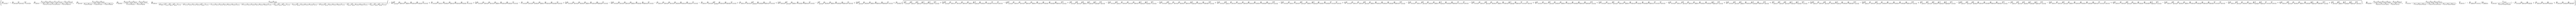

In [568]:
all_sol

In [569]:
passe = 0
L1 = L0[:]
LA.append(L1)
tabix = 0
for x in all_sol:
    subs_e = {}
    subs_e[x] = all_sol[x]
    if tabix == passe:
        for x in range(0,len(L0)):
            L0[x] = L0[x].subs(subs_e)
    tabix = tabix + 1
    

In [570]:
len(LA)

In [571]:
S,EQS = poly_difeomorphism(L0,ZE,dc,dZE,h,expand)
EQS = clean_system00(EQS,n)

In [373]:
L0 = LA[-1]

In [ ]:
EQS[1,3]

In [ ]:
EQS[2,4]

In [ ]:
EQS[1,1]

In [ ]:
f = zeros(n)

for x in range(0,n):
    for y in range(0,n):
        if x == y: f[x,y]=1/S[1,n+1]
        

In [ ]:
EQS

In [ ]:
h,f

In [ ]:
H1,S1 = difeomorphism_equations005(L0,ZE,expand,f,h,0,2*n+1)

In [ ]:
S1

In [ ]:
check_me = []
difeo_eqs = []
LD = []
LD.append(L0)
D_LD = []
D_LD.append(0)

for i in range(0,len(LD)):
    Z0 = LD[i]
    H=[]
    S = zeros(n)
    H,S = difeomorphism_equations002(Z0,ZE,expand,f,h,0,2*n+1)
    
    mixed_test = []
    t3 = 0
    t1 = t2 = 1
    for x in range(0,2*n+1):
        for y in range(x,2*n+1):
            if x != y:
                t1 = simplify(diff(H[x][1],ZE[y]))
                t2 = simplify(diff(H[y][1],ZE[x]))
                d1 = diff(H[x][0],ZE[y])
                d2 = diff(H[y][0],ZE[x])
                t3 = t3 + t1 + t2
                mixed_test.append((t1,t2))
    if t3 != 0:
        difeo_eqs.append((S,H,Z0,D_LD[i],f))
        check_me.append(mixed_test)

In [ ]:
check_me

In [ ]:
difeo_eqs[0][1]

In [ ]:
L0 = L1

In [ ]:
CM_LD = contactomorphism_equations(L0,ZE,expand,f)
Ja = Matrix(L0).jacobian(ZE)
DeJ = Ja.berkowitz_det()
for x in range(0,2*n+1):
    DeJ = DeJ.subs([(diff(L0[0],ZE[x]),CM_LD[x])])

In [ ]:
for x in range(0,2*n+1):
    Ja = Ja.subs([(diff(L0[0],ZE[x]),CM_LD[x])])
simplify(Ja)

In [ ]:
DeJ = simplify(DeJ)

In [ ]:
DeJ

In [ ]:
all_sol = {}
exclude = [ZE[1]*ZE[3],ZE[2]*ZE[4]]
for x in range(0,n):
    for y in range(0,n):
        if x != y:
            ambar = list(EQIE[x,y].values())
        else:
            ambar = []
            if x == 0:
                for i in EQIE[x,y]:
                    if i not in exclude :
                        ambar.append(EQIE[x,y][i])
        if len(all_sol) > 1:
            ambar = []
        for z in ambar:
                fs = list(z.free_symbols)
                for w in fs:
                    sol = solve(z,w,dict=True)
                    if list(sol[0].keys())[0] not in all_sol.keys():
                        all_sol.update(sol[0])
                        break

In [ ]:
S,EQS = poly_difeomorphism(L0,ZE,dc,dZE,h,factor)

In [ ]:
EQS = clean_system00(EQS,n)

In [ ]:
EQS

In [ ]:
EQS[1:n+1,n+1:2*n+1]

In [385]:
Matrix(L0)

⎡                               F(\Phi, E₁, E₂, I₁, I₂)                       
⎢                                                                             
⎢             2            3            3            2               3        
⎢        I₁⋅I₂ ⋅Q₁₁₂₁₂   I₂ ⋅Q₁₁₂₂₂   I₁ ⋅Q₁₁₂₁₂   I₁ ⋅I₂⋅Q₁₁₂₂₂   I₂ ⋅Q₁₁₁₂₂ 
⎢        ───────────── + ────────── + ────────── + ───────────── + ────────── 
⎢              E₂            E₂           E₁             E₁            E₁     
⎢                                                                             
⎢          2            3            3            2               3           
⎢     I₁⋅I₂ ⋅Q₂₁₂₁₂   I₂ ⋅Q₂₁₂₂₂   I₁ ⋅Q₂₁₂₁₂   I₁ ⋅I₂⋅Q₂₁₂₂₂   I₂ ⋅Q₁₁₁₂₂⋅Q₂₁
⎢     ───────────── + ────────── + ────────── + ───────────── + ──────────────
⎢           E₂            E₂           E₁             E₁            E₁⋅Q₁₁₂₁₂ 
⎢                                                                             
⎢    3                   2                         2

In [344]:
Matrix(L0)

⎡                               F(\Phi, E₁, E₂, I₁, I₂)                       
⎢                                                                             
⎢             2            3            3            2               3        
⎢        I₁⋅I₂ ⋅Q₁₁₂₁₂   I₂ ⋅Q₁₁₂₂₂   I₁ ⋅Q₁₁₂₁₂   I₁ ⋅I₂⋅Q₁₁₂₂₂   I₂ ⋅Q₁₁₁₂₂ 
⎢        ───────────── + ────────── + ────────── + ───────────── + ────────── 
⎢              E₂            E₂           E₁             E₁            E₁     
⎢                                                                             
⎢          2            3            3            2               3           
⎢     I₁⋅I₂ ⋅Q₂₁₂₁₂   I₂ ⋅Q₂₁₂₂₂   I₁ ⋅Q₂₁₂₁₂   I₁ ⋅I₂⋅Q₂₁₂₂₂   I₂ ⋅Q₁₁₁₂₂⋅Q₂₁
⎢     ───────────── + ────────── + ────────── + ───────────── + ──────────────
⎢           E₂            E₂           E₁             E₁            E₁⋅Q₁₁₂₁₂ 
⎢                                                                             
⎢    3                   2                         2

In [386]:
EQS[1:1+n,1+n:2*n+1]

⎡⎧                                                                            
⎢⎪              2⋅Q₁₁₂₁₂⋅Q₂₁₂₂₂⋅R₂₂₂₂₁   2⋅Q₁₁₂₂₂⋅Q₂₁₂₁₂⋅R₂₂₂₂₁               
⎢⎨E₁⋅I₁: -p₁₁ - ────────────────────── + ──────────────────────, E₂⋅I₂: 2⋅Q₂₁₂
⎢⎪                      Q₁₁₁₂₂                   Q₁₁₁₂₂                       
⎢⎩                                                                            
⎢                                                                             
⎢                                                    ⎧  2   3       3   2   ⎫ 
⎢                                                    ⎪E₁ ⋅I₂      E₁ ⋅I₂    ⎪ 
⎢                                                    ⎨───────: 0, ───────: 0⎬ 
⎢                                                    ⎪      2        2      ⎪ 
⎣                                                    ⎩ E₂⋅I₁       E₂ ⋅I₁   ⎭ 

                                               3   ⎫                          
                  2⋅Q₁₁₂₂₂⋅Q₂₁₂₁₂⋅R₂₂₂₂₁  E₁⋅I₂    

In [387]:
EQS[1:1+n,1:n+1]

⎡⎧          3       2   2       2   3                ⎫  ⎧            2   2    
⎢⎪  2     I₂      E₂ ⋅I₂      E₂ ⋅I₁      E₂⋅I₁⋅I₂   ⎪  ⎪          E₂ ⋅I₁     
⎢⎨I₁ : 0, ───: 0, ───────: 0, ───────: 0, ────────: 0⎬  ⎨I₁⋅I₂: 0, ───────: 0,
⎢⎪         I₁         2          2           E₁      ⎪  ⎪              2      
⎢⎩                  E₁         E₁ ⋅I₂                ⎭  ⎩            E₁       
⎢                                                                             
⎢                                                            ⎧                
⎢                                                            ⎪  2     E₁⋅I₁⋅I₂
⎢                          0                                 ⎨I₂ : 0, ────────
⎢                                                            ⎪           E₂   
⎣                                                            ⎩                

      2          3   ⎫⎤
 E₂⋅I₂      E₂⋅I₁    ⎪⎥
 ──────: 0, ──────: 0⎬⎥
   E₁       E₁⋅I₂    ⎪⎥
                     ⎭⎥
          

In [388]:
EQS[1+n:2*n+1,n+1:2*n+1]

⎡⎧                       3   2   ⎫  ⎧            2   2       3                
⎢⎪  2     E₁⋅E₂⋅I₂     E₁ ⋅I₂    ⎪  ⎪          E₂ ⋅I₁      E₂ ⋅I₁             
⎢⎨E₁ : 0, ────────: 0, ───────: 0⎬  ⎨E₁⋅E₂: 0, ───────: 0, ──────: Q₂₁₂₂₂⋅R₂₂₂
⎢⎪           I₁              2   ⎪  ⎪              2       E₁⋅I₂              
⎢⎩                      E₂⋅I₁    ⎭  ⎩            I₂                           
⎢                                                                             
⎢                                   ⎧  3   2                                  
⎢                                   ⎪E₂ ⋅I₁      E₁⋅E₂⋅I₁  Q₁₁₂₁₂⋅Q₂₁₂₂₂⋅R₂₂₂₂
⎢                0                  ⎨───────: 0, ────────: ───────────────────
⎢                                   ⎪      2        I₂            Q₁₁₁₂₂      
⎣                                   ⎩ E₁⋅I₂                                   

                         ⎫⎤
     Q₁₁₂₂₂⋅Q₂₁₂₁₂⋅R₂₂₂₂₁⎪⎥
₂₁ - ────────────────────⎬⎥
            Q₁₁₂₁₂       ⎪⎥
                  

In [ ]:
for x in range(0,2*n+1):
    for y in range(0,2*n+1):
        S[x,y] = (S[x,y])